In [1]:
import os
import numpy as np
from tqdm import tqdm
from datasets import load_from_disk, load_dataset

/work/pi_mccallum_umass_edu/kchimmad_umass_edu/conda_envs/reason/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [82]:
data_path='../outputs/exp-2.1.1/eval_1/logprobs1.json'
logprobs=load_dataset('json', data_files=data_path)['train']
logprobs

Dataset({
    features: ['prompt', 'gt_reasoning', 'gt_answer', 'student_token_ids', 'student_reasoning', 'student_answer', 'student_correctness', 'student_log_probs', 'teacher_log_probs', 'teacher_correctness'],
    num_rows: 1000
})

In [83]:
len(logprobs['student_log_probs'][0])

172

In [84]:
tr_stu_logprob_per_token=[]
tr_stu_logprob=[]
student_logprob=[]
teacher_logprob=[]

student_probs=[]
teacher_probs=[]

for i in tqdm(range(logprobs.num_rows)):
    per_token=[]
    stu_logprob_sum=0
    tr_logprob_sum=0
    student_log_probs=np.array(logprobs['student_log_probs'][i])
    teacher_log_probs=np.array(logprobs['teacher_log_probs'][i])
    
    student_probs.append(np.exp(student_log_probs).tolist())
    teacher_probs.append(np.exp(teacher_log_probs).tolist())
    
    tr_stu_logprob_per_token.append(
        np.subtract(teacher_log_probs,student_log_probs)
    )
    
    student_logprob.append(np.mean(student_log_probs))
    teacher_logprob.append(np.mean(teacher_log_probs))
    tr_stu_logprob.append(
        np.subtract(
            np.mean(teacher_log_probs),
            np.mean(student_log_probs)
        )
    )


100%|██████████| 1000/1000 [01:20<00:00, 12.40it/s]


In [85]:
logprobs=logprobs.add_column('teacher_student_logprob_per_token',tr_stu_logprob_per_token)
logprobs=logprobs.add_column('student_logprob',student_logprob)
logprobs=logprobs.add_column('teacher_logprob',teacher_logprob)
logprobs=logprobs.add_column('teacher_student_logprob',tr_stu_logprob)
logprobs=logprobs.add_column('student_prob',np.exp(student_logprob).tolist())
logprobs=logprobs.add_column('teacher_prob',np.exp(teacher_logprob).tolist())
logprobs=logprobs.add_column('student_probs',student_probs)
logprobs=logprobs.add_column('teacher_probs',teacher_probs)

                             

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [87]:
df=logprobs.to_pandas()

In [88]:
# df=df[df['teacher_correctness']==1]

In [89]:
# df[df['student_correctness']==0].shape[0]/df[df['student_correctness']==1].shape[0]

In [90]:
# df1=df[df['student_correctness']==1].sample(frac=0.065, random_state=42)
# df2=df[df['student_correctness']==0]

# df=pd.concat([df1, df2])

In [91]:
df.head()

,prompt,gt_reasoning,gt_answer,student_token_ids,student_reasoning,student_answer,student_correctness,student_log_probs,teacher_log_probs,teacher_correctness,teacher_student_logprob_per_token,student_logprob,teacher_logprob,teacher_student_logprob,student_prob,teacher_prob,student_probs,teacher_probs
0,<|begin_of_text|><|start_header_id|>system<|en...,The volume of the box is 8 x 10 x 12 = <<8*10*...,40,"[1271, 1505, 704, 1268, 1690, 4857, 10215, 649...",To find out how many building blocks can fit i...,4,1,"[-4.506111145019532e-05, -0.130859375, -0.1425...","[0.0, -0.318359375, -0.126953125, 0.0, 0.0, -0...",1,"[4.506111145019532e-05, -0.1875, 0.015625, 2.7...",-0.061909,-0.131031,-0.069121,0.939968,0.877191,"[0.9999549399037865, 0.877341141814636, 0.8671...","[1.0, 0.7273413531419732, 0.880774957955678, 1..."
1,<|begin_of_text|><|start_header_id|>system<|en...,The cost Rachel should budget for her pair of ...,500,"[1271, 1505, 704, 1268, 1790, 32532, 1288, 819...","To find out how much Rachel should budget, we ...",5,1,"[-0.0031585693359370004, -0.63671875, -0.07177...","[-2.384185791015625e-07, -0.48828125, -0.00070...",1,"[0.003158330917357899, 0.1484375, 0.0710678100...",-0.155661,-0.199877,-0.044216,0.855849,0.818831,"[0.9968464136963897, 0.5290254439903965, 0.930...","[0.9999997615814493, 0.6136802511983585, 0.999..."
2,<|begin_of_text|><|start_header_id|>system<|en...,Jackson used 20 x 1/4 = <<20*1/4=5>>5 kilogram...,12,"[1271, 1505, 704, 1268, 1690, 85402, 315, 1333...",To find out how many kilograms of meat are lef...,1,1,"[-0.0185546875, -0.349609375, -0.38671875, -0....","[-0.0007591247558590001, -0.2255859375, -0.160...",1,"[0.017795562744141, 0.1240234375, 0.2265625, 0...",-0.130274,-0.172347,-0.042073,0.877855,0.841687,"[0.9816163909775121, 0.7049634122741956, 0.679...","[0.9992411633064422, 0.7980484752100729, 0.852..."
3,<|begin_of_text|><|start_header_id|>system<|en...,"There are 35 people in Annie's class, which me...",8,"[1271, 11886, 420, 3575, 11, 584, 1205, 311, 1...","To solve this problem, we need to find out how...",6,0,"[-0.05029296875, -0.5859375, -0.0888671875, -0...","[-0.00038337707519500003, -1.8671875, -0.12695...",1,"[0.049909591674805, -1.28125, -0.0380859375, -...",-0.194914,-0.663374,-0.468460,0.822905,0.515110,"[0.9509507848236067, 0.556583819812148, 0.9149...","[0.9996166964044055, 0.15455774475698483, 0.88..."
4,<|begin_of_text|><|start_header_id|>system<|en...,Hans’s party includes 12 - 2 = <<12-2=10>>10 a...,52,"[1271, 1505, 279, 2860, 16946, 3392, 11, 584, ...","To find the total deposit amount, we need to c...",5,1,"[-0.0263671875, -0.56640625, -0.126953125, -0....","[-0.00021076202392500003, -0.51171875, -0.8242...",1,"[0.026156425476075, 0.0546875, -0.697265625, -...",-0.109277,-0.270645,-0.161368,0.896482,0.762887,"[0.9739773916181681, 0.5675614520150244, 0.880...","[0.9997892601848302, 0.5994643634907089, 0.438..."


In [92]:
df.shape

(1000, 18)

In [93]:

# Define colors based on score
df['color'] = df['student_correctness'].map({1: 'green', 0: 'red'})


In [94]:
# df=df[df['teacher_correctness']==1]
# df.shape

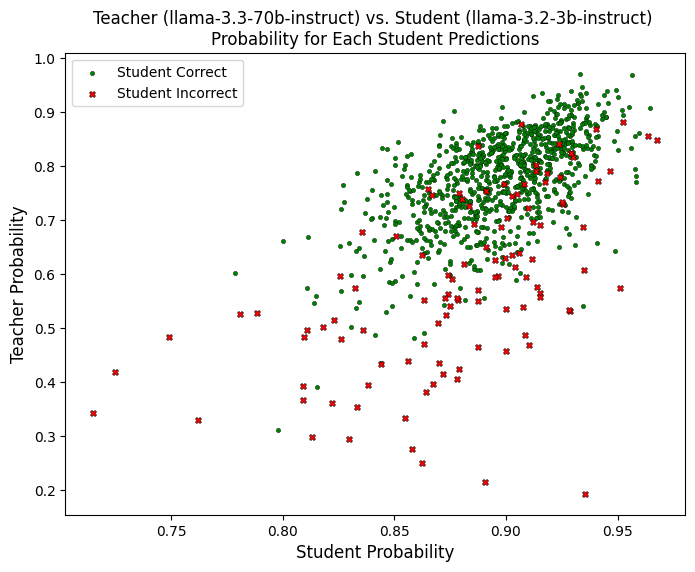

In [95]:
plt.figure(figsize=(8, 6))

# Separate data
correct = df[df['student_correctness'] == 1]
incorrect = df[df['student_correctness'] == 0]

# Plot correct predictions: green dots
sns.scatterplot(
    x=correct['student_prob'], 
    y=correct['teacher_prob'],
    color='green',
    edgecolor='black',
    s=10,
    label='Student Correct',
    marker='o'
)

# Plot incorrect predictions: red crosses
sns.scatterplot(
    x=incorrect['student_prob'], 
    y=incorrect['teacher_prob'],
    color='red',
    edgecolor='black',
    s=20,
    label='Student Incorrect',
    marker='X'
)

# Labels and title
plt.xlabel("Student Probability", fontsize=12)
plt.ylabel("Teacher Probability", fontsize=12)
plt.title("Teacher (llama-3.3-70b-instruct) vs. Student (llama-3.2-3b-instruct) \nProbability for Each Student Predictions")
plt.legend()
plt.savefig('StuvsTrProbPerExample3B.png')
plt.show()


In [41]:
# # Plot scatter plot
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=df['student_prob'], y=df['teacher_prob'], hue=df['student_correctness'], palette={1: 'green', 0: 'red'}, edgecolor='black', s=5)

# # Labels and title
# plt.xlabel("Student Prob")
# plt.ylabel("Teacher Prob")
# plt.title("Example-Level Scatter Plot of Student vs. Teacher Prob for LLaMA 3B")
# plt.legend(title="Score", labels=[ "1 (Green)", "0 (Red)"])
# plt.savefig('StuvsTrProbPerExample3B.png')
# plt.show()


In [28]:
student_wrong=df[df['color']=='red']['student_probs'].explode().tolist()
teacher_wrong=df[df['color']=='red']['teacher_probs'].explode().tolist()


In [29]:
student_right=df[df['color']=='green']['student_probs'].explode().tolist()
teacher_right=df[df['color']=='green']['teacher_probs'].explode().tolist()


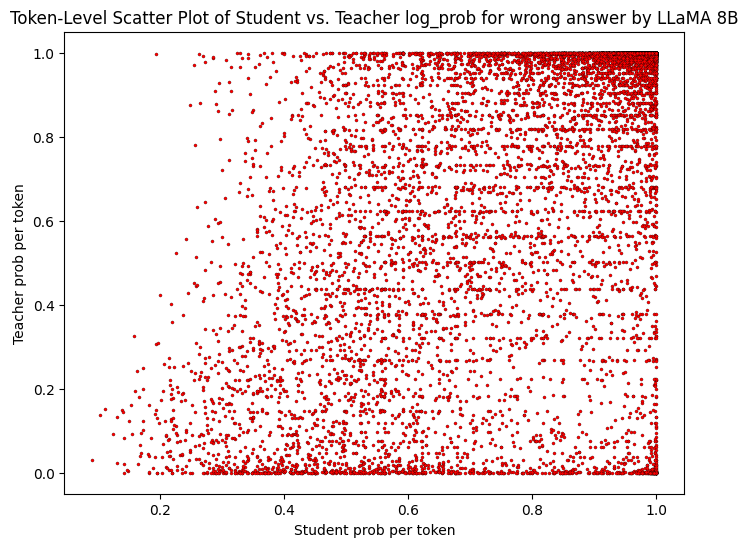

In [30]:
# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=student_wrong, y=teacher_wrong, edgecolor='black', s=5, c='red')

# Labels and title
plt.xlabel("Student prob per token")
plt.ylabel("Teacher prob per token")
plt.title("Token-Level Scatter Plot of Student vs. Teacher log_prob for wrong answer by LLaMA 8B")
plt.savefig('StuvsTrProbPerTokenWrong8B.png')
plt.show()

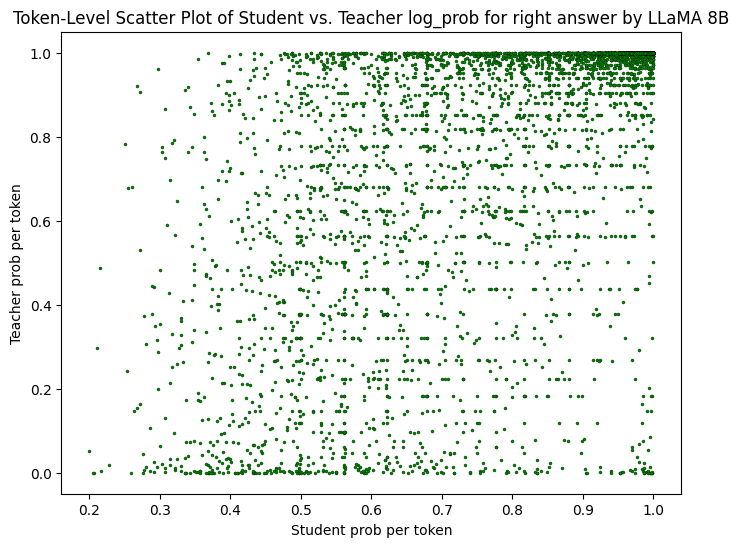

In [31]:
# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=student_right, y=teacher_right, edgecolor='black', s=5, c='green')

# Labels and title
plt.xlabel("Student prob per token")
plt.ylabel("Teacher prob per token")
plt.title("Token-Level Scatter Plot of Student vs. Teacher log_prob for right answer by LLaMA 8B")
plt.savefig('StuvsTrProbPerTokenRight8B.png')
plt.show()

## logprob_ratio


In [1]:
import os
import numpy as np
from tqdm import tqdm
from datasets import load_from_disk, load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/work/pi_mccallum_umass_edu/kchimmad_umass_edu/conda_envs/reason/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_path='../outputs/exp-2.1.1/eval_1/logprobs1.json'
logprobs=load_dataset('json', data_files=data_path)['train']
logprobs

Dataset({
    features: ['prompt', 'gt_reasoning', 'gt_answer', 'student_token_ids', 'student_reasoning', 'student_answer', 'student_correctness', 'student_log_probs', 'teacher_log_probs', 'teacher_correctness'],
    num_rows: 1000
})

In [ ]:
tr_stu_logprob_per_token=[]
tr_stu_logprob=[]
student_logprob=[]
teacher_logprob=[]
eps=1e-8
for i in tqdm(range(logprobs.num_rows)):
    per_token=[]
    stu_logprob_sum=0
    tr_logprob_sum=0
    student_log_probs=np.array(logprobs['student_log_probs'][i])
    teacher_log_probs=np.array(logprobs['teacher_log_probs'][i])
    tr_stu_logprob_per_token.append(
        np.divide(
            np.sum(teacher_log_probs,eps),
            np.sum(student_log_probs,eps)
        )
    )
    student_logprob.append(np.mean(student_log_probs))
    teacher_logprob.append(np.mean(teacher_log_probs))
    tr_stu_logprob.append(
        np.divide(
            np.mean(teacher_log_probs),
            np.mean(student_log_probs)
        )
    )


In [ ]:
logprobs=logprobs.add_column('teacher_student_logprob_per_token',tr_stu_logprob_per_token)
logprobs=logprobs.add_column('student_logprob',student_logprob)

### TOKEN LEVEL ANALYSIS